# Practice Exercise - Linear Regression

### Problem Statement

The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us. 

### Data Information

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 dollars
- PTRATIO: pupil-teacher ratio by town
- LSTAT: %lower status of the population
- MEDV: Median value of owner-occupied homes in 1000 dollars.

### Import Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Load the dataset

In [2]:
 data = pd.read_csv("boston.csv")

### Check the shape of the dataset

In [3]:
data.shape

(506, 13)

In [4]:
# check the some rows in the data
data.sample(5)

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
95,0.12204,0.0,2.89,0,0.445,6.625,57.8,3.4952,2,276,18.0,6.65,28.4
78,0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,5,398,18.7,12.34,21.2
258,0.66351,20.0,3.97,0,0.647,7.333,100.0,1.8946,5,264,13.0,7.79,36.0
266,0.78570,20.0,3.97,0,0.647,7.014,84.6,2.1329,5,264,13.0,14.79,30.7
407,11.95110,0.0,18.10,0,0.659,5.608,100.0,1.2852,24,666,20.2,12.13,27.9


### Get the info regarding column datatypes

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


##### The above information of the data shows that the data are either in floats or integers

### Get summary statistics for the numerical columns

In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Exploratory Data Analysis

**Plot the distribution plots for all the numerical features and list your observations.**

Text(0.5, 1.0, 'Crime Rate by Town')

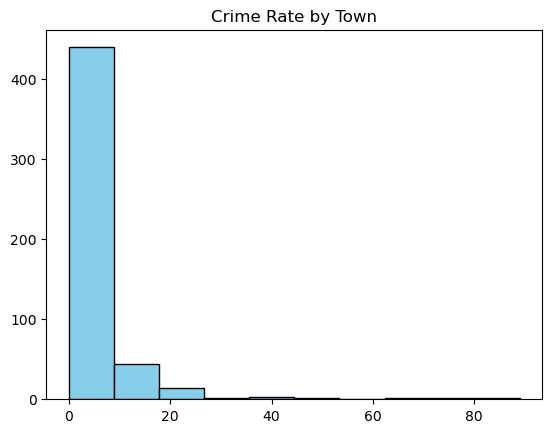

In [7]:
plt.hist(data['CRIM'], color='skyblue', edgecolor='black',)
plt.title("Crime Rate by Town")

Text(0.5, 1.0, 'Proportion of Residential Zoned Land')

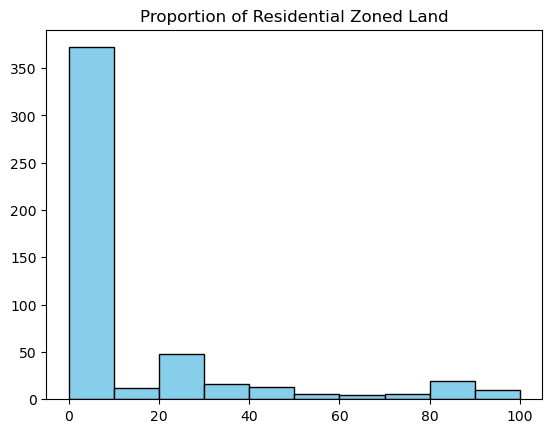

In [8]:
plt.hist(data['ZN'], color='skyblue', edgecolor='black',)
plt.title("Proportion of Residential Zoned Land")

Text(0.5, 1.0, 'Proportion of Non-Retail Business Acres per Town')

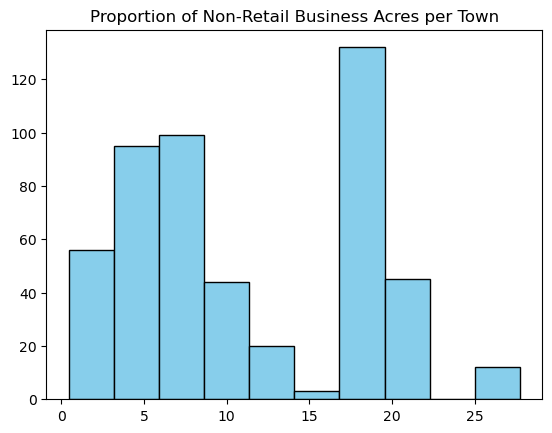

In [9]:
plt.hist(data['INDUS'], color='skyblue', edgecolor='black',)
plt.title("Proportion of Non-Retail Business Acres per Town")

Text(0.5, 1.0, 'Charles River Dummy Variable')

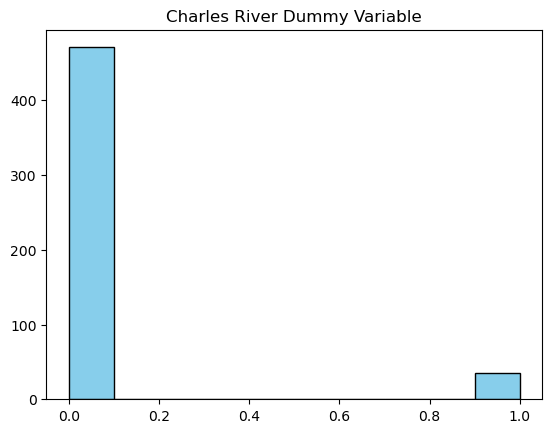

In [10]:
plt.hist(data['CHAS'], color='skyblue', edgecolor='black',)
plt.title("Charles River Dummy Variable")

Text(0.5, 1.0, 'Nitric Oxide Concentration')

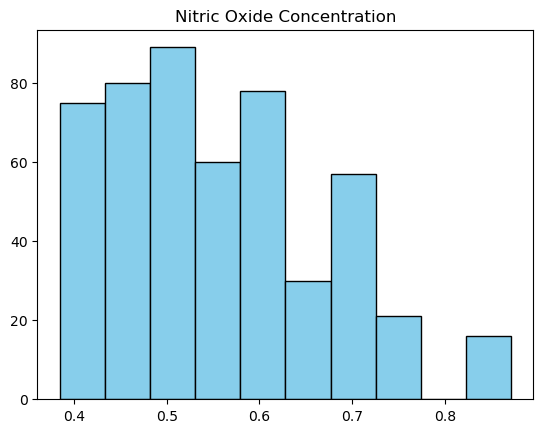

In [11]:
plt.hist(data['NX'], color='skyblue', edgecolor='black',)
plt.title("Nitric Oxide Concentration")

Text(0.5, 1.0, 'Avg. Number of Rooms per Dwelling')

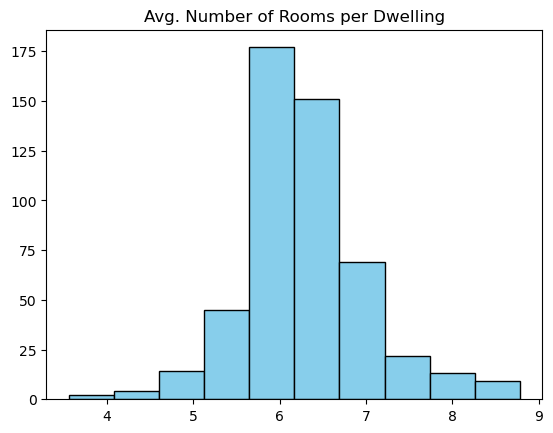

In [12]:
plt.hist(data['RM'], color='skyblue', edgecolor='black',)
plt.title("Avg. Number of Rooms per Dwelling")

Text(0.5, 1.0, 'Proportion of Owner-Occupied Unit buit prior to 1940')

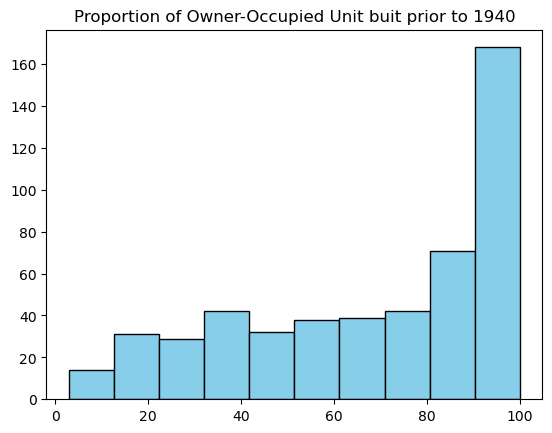

In [13]:
plt.hist(data['AGE'], color='skyblue', edgecolor='black',)
plt.title("Proportion of Owner-Occupied Unit buit prior to 1940")

Text(0.5, 1.0, 'Weighted Distances to Five Boston Employment Centers')

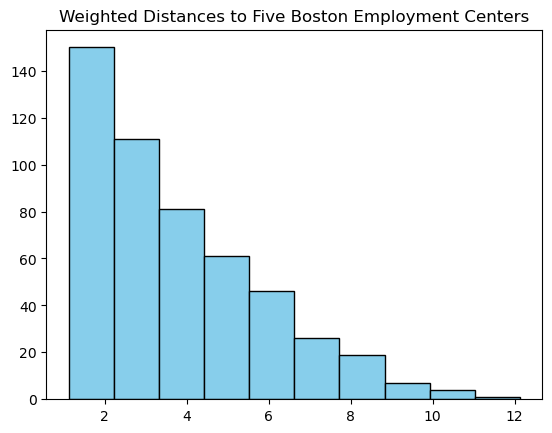

In [14]:
plt.hist(data['DIS'], color='skyblue', edgecolor='black',)
plt.title("Weighted Distances to Five Boston Employment Centers")

Text(0.5, 1.0, 'Index of Accesibility to Radial Highways')

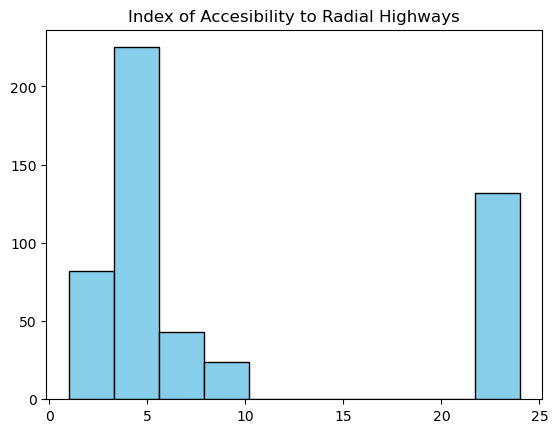

In [15]:
plt.hist(data['RAD'], color='skyblue', edgecolor='black',)
plt.title("Index of Accesibility to Radial Highways")

Text(0.5, 1.0, 'Full-Value Property Tax Rate ')

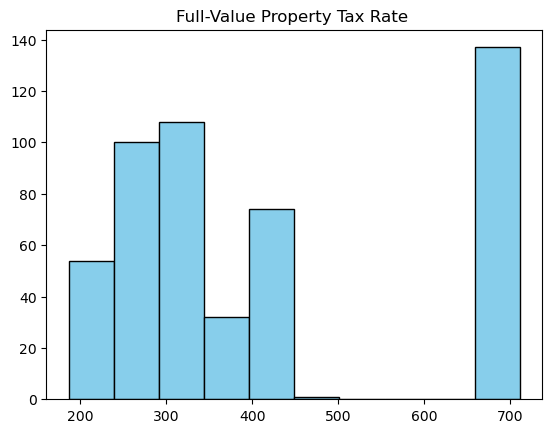

In [16]:
plt.hist(data['TAX'], color='skyblue', edgecolor='black')
plt.title("Full-Value Property Tax Rate ")

Text(0.5, 1.0, 'Pupil - Teacher Ratio by Town')

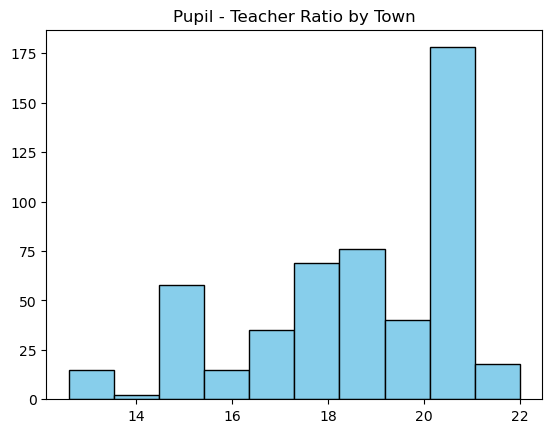

In [17]:
plt.hist(data['PTRATIO'], color='skyblue', edgecolor='black',)
plt.title("Pupil - Teacher Ratio by Town")

Text(0.5, 1.0, 'Percentage of the Lower Status of the Population')

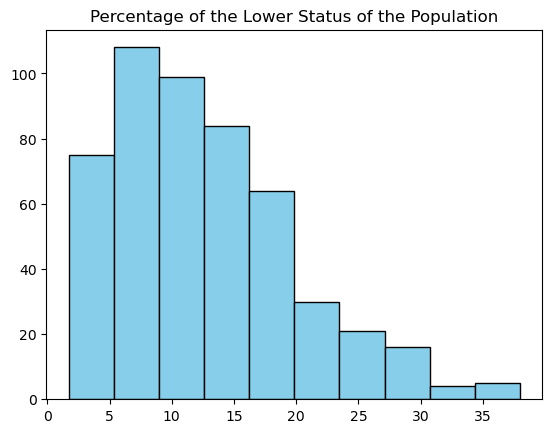

In [18]:
plt.hist(data['LSTAT'], color='skyblue', edgecolor='black',)
plt.title("Percentage of the Lower Status of the Population")

Text(0.5, 1.0, "Median Value of Owner - Occupied Homes ('$1000)")

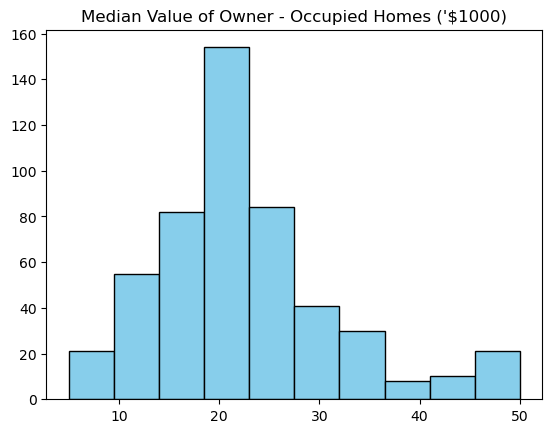

In [19]:
plt.hist(data['MEDV'], color='skyblue', edgecolor='black',)
plt.title("Median Value of Owner - Occupied Homes ('$1000)")

## It was noticed that most of the independent variables except the "Avg. Number of Rooms per dwelling" were not normally distributed. The target variable was also right skewed. There will be need to re-scale all variables before determining the correlation that exist between them and the target variable. 

##

**Plot the scatterplots for features and the target variable `MEDV` and list your observations.**

Text(0.5, 1.0, 'Crime Rate vs Median Value')

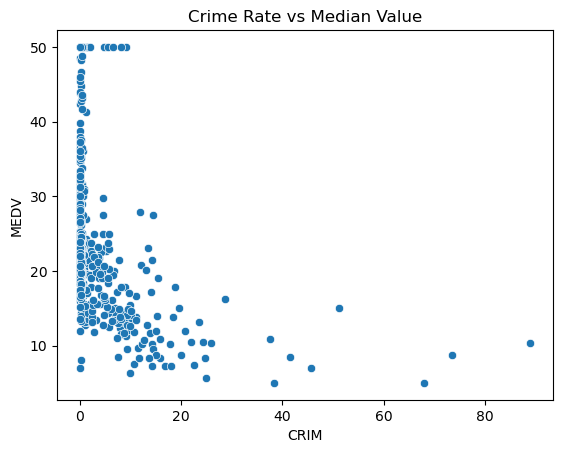

In [20]:
sns.scatterplot(data = data, x = 'CRIM', y = 'MEDV')
plt.title ("Crime Rate vs Median Value")

Text(0.5, 1.0, 'Residential Zoned Land vs Median Value')

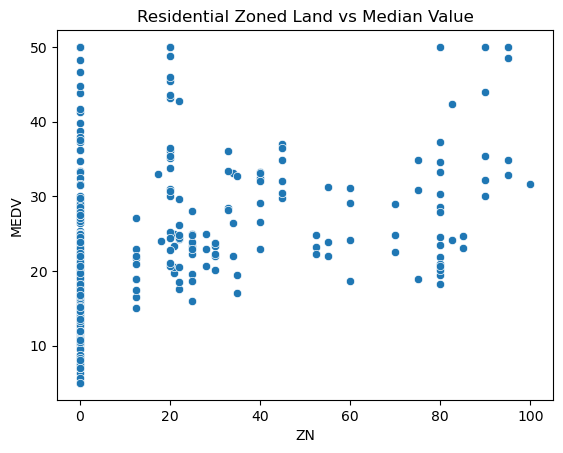

In [21]:
sns.scatterplot(data = data, x = 'ZN', y = 'MEDV')
plt.title ("Residential Zoned Land vs Median Value")

Text(0.5, 1.0, 'Propotion of Non-Retail Business vs Median Value')

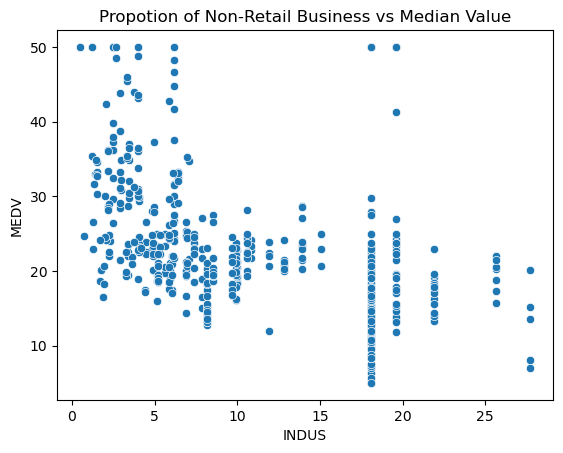

In [22]:
sns.scatterplot(data = data, x = 'INDUS', y = 'MEDV')
plt.title ("Propotion of Non-Retail Business vs Median Value")

Text(0.5, 1.0, 'Charles River Dummy Variable vs Median Value')

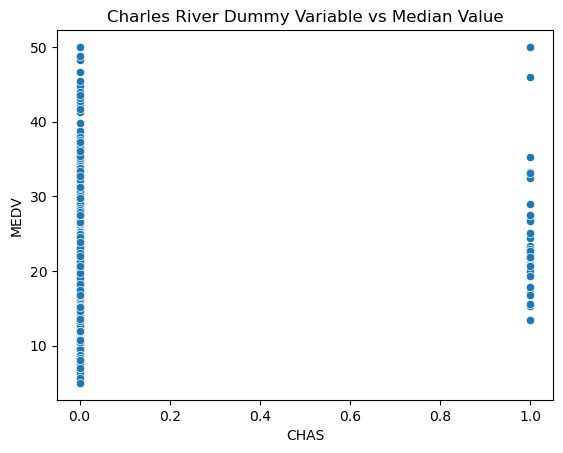

In [23]:
sns.scatterplot(data = data, x = 'CHAS', y = 'MEDV')
plt.title ("Charles River Dummy Variable vs Median Value")

Text(0.5, 1.0, 'Nitric Oxides Concentration vs Median Value')

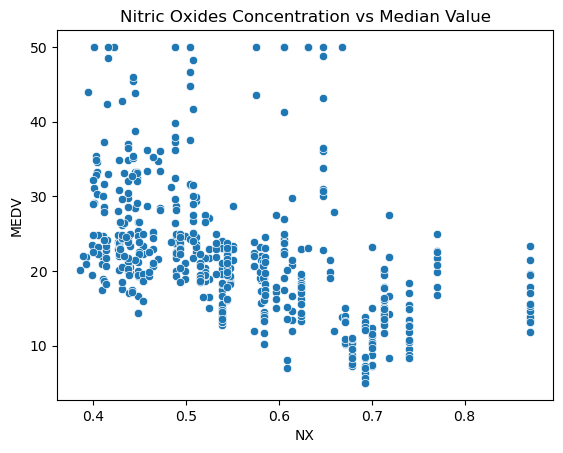

In [24]:
sns.scatterplot(data = data, x = 'NX', y = 'MEDV')
plt.title ("Nitric Oxides Concentration vs Median Value")

Text(0.5, 1.0, 'Avg. Number of Rooms per dwelling vs Median Value')

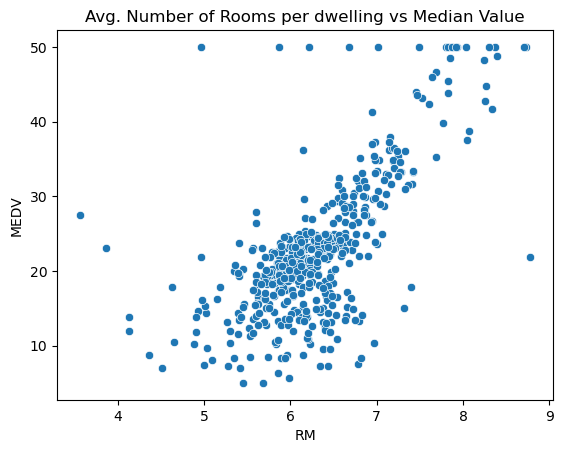

In [25]:
sns.scatterplot(data = data, x = 'RM', y = 'MEDV')
plt.title ("Avg. Number of Rooms per dwelling vs Median Value")

Text(0.5, 1.0, 'Owner occupied units prior to 1940 vs Median Value')

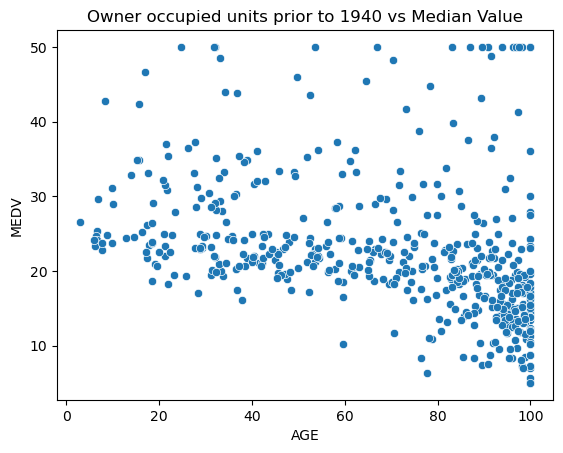

In [26]:
sns.scatterplot(data = data, x = 'AGE', y = 'MEDV')
plt.title ("Owner occupied units prior to 1940 vs Median Value")

Text(0.5, 1.0, 'Distance to 5 Boston Employment Centers vs Median Value')

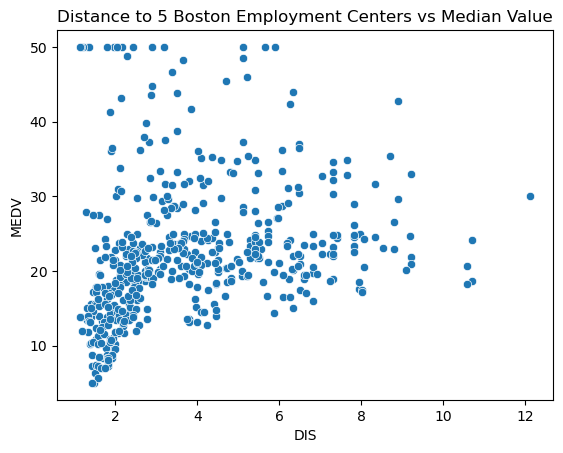

In [27]:
sns.scatterplot(data = data, x = 'DIS', y = 'MEDV')
plt.title ("Distance to 5 Boston Employment Centers vs Median Value")

Text(0.5, 1.0, 'Accessibility to Radial Highways vs Median Value')

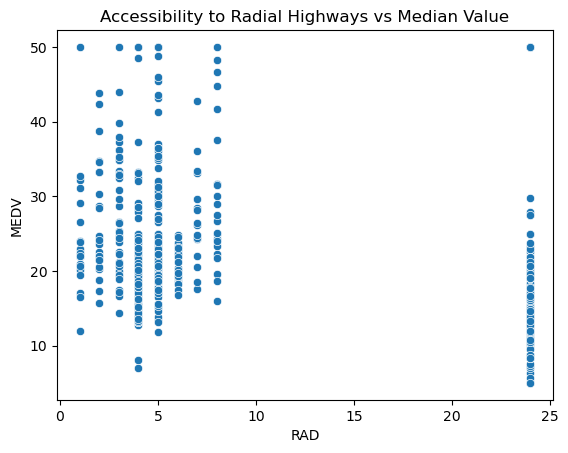

In [28]:
sns.scatterplot(data = data, x = 'RAD', y = 'MEDV')
plt.title ("Accessibility to Radial Highways vs Median Value")

Text(0.5, 1.0, 'Full-Value Property-Tax Rate vs Median Value')

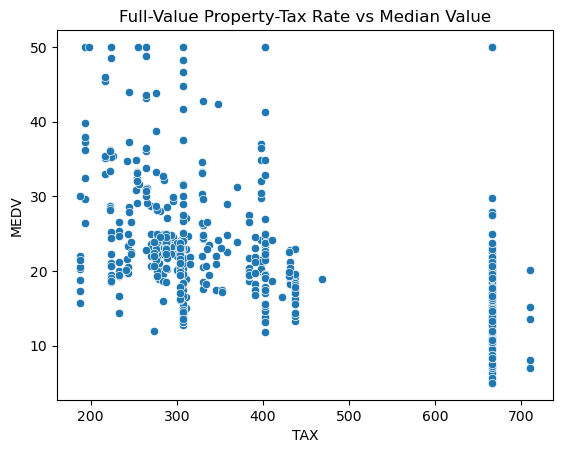

In [29]:
sns.scatterplot(data = data, x = 'TAX', y = 'MEDV')
plt.title ("Full-Value Property-Tax Rate vs Median Value")

Text(0.5, 1.0, 'Pupil-Teacher Ration vs Median Value')

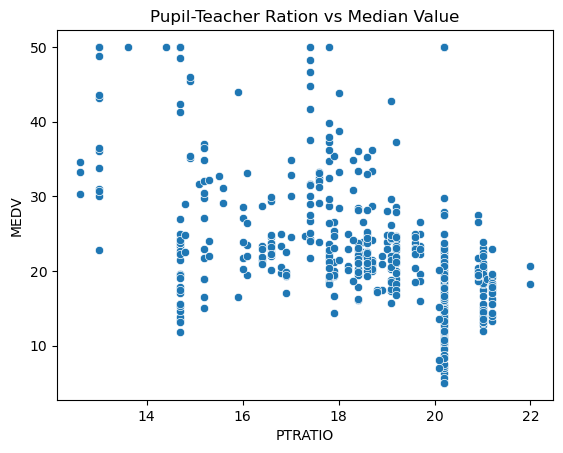

In [30]:
sns.scatterplot(data = data, x = 'PTRATIO', y = 'MEDV')
plt.title ("Pupil-Teacher Ration vs Median Value")

Text(0.5, 1.0, 'Lower Status of the Population vs Median Value')

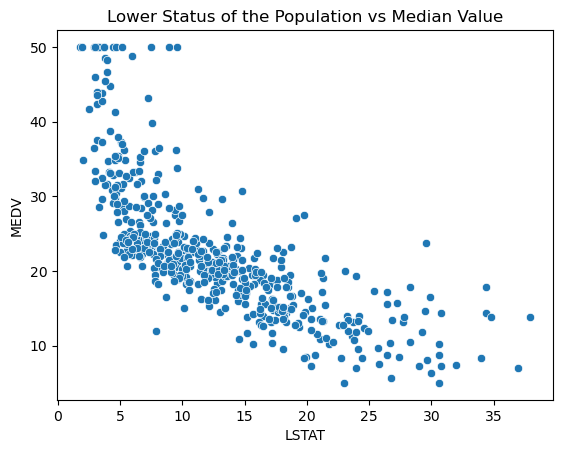

In [31]:
sns.scatterplot(data = data, x = 'LSTAT', y = 'MEDV')
plt.title ("Lower Status of the Population vs Median Value")

### Based on the various scattered plots above, it could be noticed that all plot except that which shows the relationship between the "Charles River Dummy Variable" and "MEDV" shows that there exist a level of correlation between the target variable and other independent variables.

**Plot the correlation heatmap and list your observations.**

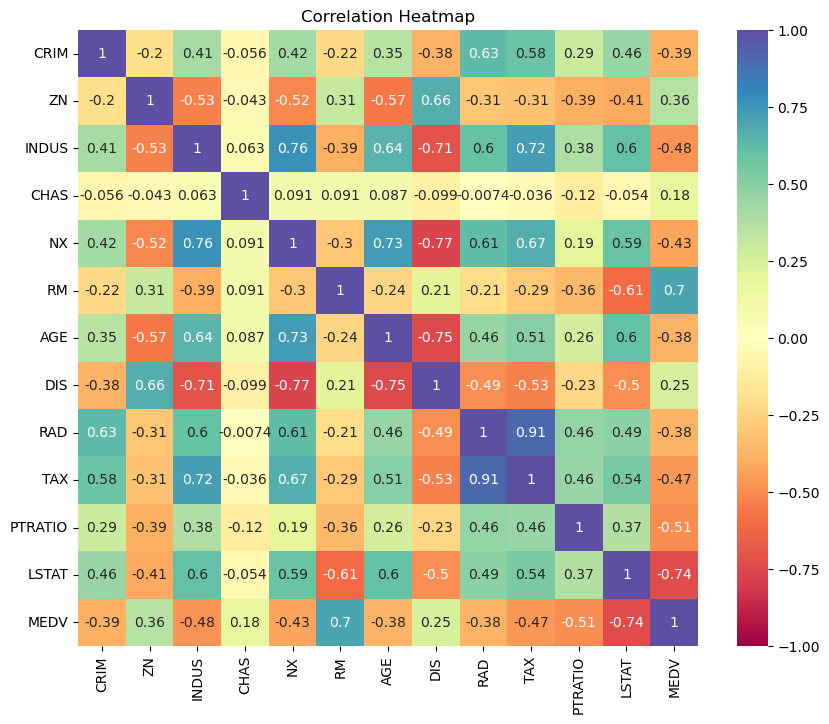

In [32]:
data_corr = data.corr()
# Set the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(data_corr, annot=True, cmap='Spectral', vmin= -1, vmax= 1)
plt.title('Correlation Heatmap')
plt.show()

####  Based on the heatmap above, it could be noticed that some of the independent variables are moderately or strongly correlated with each other, such as :                                                                                                              INDUS & TAX, RAD & TAX, AGE & NX, NX & TAX, INDUS & NX, ZN & DIS, CRIM & RAD, CRIM & TAX, The following independent variables would be dropped:                                                                                                                      TAX, NX since they are the major variables tied with other independent variable.

###

In [33]:
# Drop the following independent variables "TAX" & "NX", by also creating a new dataframe
data_copy = data.drop(['TAX', 'NX'], axis=1)

In [34]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   RM       506 non-null    float64
 5   AGE      506 non-null    float64
 6   DIS      506 non-null    float64
 7   RAD      506 non-null    int64  
 8   PTRATIO  506 non-null    float64
 9   LSTAT    506 non-null    float64
 10  MEDV     506 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 43.6 KB


### Split the dataset

Split the data into the dependent and independent variables, and further split it in a ratio of 70:30 for train and test sets.

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# classify independent variable to "X" and target variable to "y"

X = data_copy.drop('MEDV',axis= 1)
y = data_copy['MEDV']


In [37]:
#convert the target variable using the logarithm exploration
y_transformed = np.log(y)

In [38]:
#splitting the data into 70:30 ratio for train and test sets
X_train, X_test, y_train_transformed, y_test_transformed = train_test_split(X, y_transformed, test_size=0.3, random_state=18)

### Model Building

In [39]:
#convert all independent variables using the Standard Scaler
from sklearn.preprocessing import StandardScaler

In [40]:
# define the StandardScaler
scaler = StandardScaler()
# fit and transform all independent variables ("X")

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
X_train_scaled

array([[ 0.69356183, -0.4885721 ,  1.00347596, ...,  1.57624199,
         0.74875304,  1.06958343],
       [-0.41934932,  3.59728954, -1.46961506, ..., -0.55177961,
        -1.592024  , -1.25090067],
       [-0.41316782, -0.4885721 ,  0.38299246, ..., -0.55177961,
        -0.99535534, -0.40467584],
       ...,
       [-0.41329409, -0.4885721 ,  2.11621954, ..., -0.88778302,
         0.24387956,  0.2852775 ],
       [-0.41029804,  1.14577256, -0.71943429, ..., -0.66378075,
        -0.44458427, -1.39390382],
       [-0.41377368,  2.37153105, -1.33402246, ..., -0.55177961,
        -1.72971677, -1.10052622]])

In [42]:
print(f" Test Shape: {X_test_scaled.shape}")
print(f" Train Shape: {X_train_scaled.shape}")

 Test Shape: (152, 10)
 Train Shape: (354, 10)


**Fit the model to the training set**

In [43]:
# import the Linear Regression algorithm
from sklearn.linear_model import LinearRegression

In [44]:
#create an instance for the Linear Regression algorithm
li_reg = LinearRegression()
# fit the model
actual = li_reg.fit(X_train_scaled, y_train_transformed)

print(actual)

LinearRegression()


In [45]:
li_reg.coef_

array([-0.08873861,  0.0222709 , -0.0410221 ,  0.04341083,  0.05606409,
       -0.00309749, -0.06453356,  0.01588247, -0.06323116, -0.23284537])

## Based on the model coefficient derived above, It was noticed that some of the variables such as Crime Rate, Proportion of non-retail businesses , Propotion of owner occupied buildings, weighted distance to five Boston employment centres, pupil - teacher ratio within the town and the lower status of the population all have a negative coefficient, which shows they have an inverse relationship with the target variable

**Get the score on training set**

In [48]:
# define the predicted X test values
y_predict = li_reg.predict(X_test_scaled)

In [49]:
y_predict.shape

(152,)

In [50]:
from sklearn.metrics import r2_score
r2_value = r2_score(y_test_transformed, y_predict)

print("R-squared score:", r2_value)

R-squared score: 0.73877404091068


**Write your own function for the R-squared score.**

**To create a function for the R-squared score, we need to understand the formular,**
    **The formular is (1 - (Residual Sum of Squares / Total Sum of Squares))**
        **Where RSS = (Sum of Actual - Predicted) ** 2**
              **TSS = (Sum of Actual - Actual Mean) ** 2**

In [51]:
def r_squared(actual, predicted):
    """
    The function is used for calculating the Coefficient of Determination (r2) using the actual and predicted values;
    The below listed parameter(s) would be used for the computation
    
    Actual Values
    Predcited Values
    Residual Sum of Squares  = (Sum of Actual - Predicted) ** 2
    Total Sum of Squares = (Sum of Actual - Actual Mean) ** 2
    """
    actual_mn = np.mean(actual)
    residual_sum_squares = np.sum((actual - predicted) ** 2)
    total_sum_squares = np.sum((actual - actual_mn) ** 2)
   
    
    r2 = 1 - (residual_sum_squares / total_sum_squares)
    
    return r2

In [52]:
# check the R-squared output using the function created above
r2 = r_squared(y_test_transformed,y_predict)
print(f"The Coefficient of Determination (r2) is {r2}")

The Coefficient of Determination (r2) is 0.73877404091068


**Get the score on test set**

In [53]:
# import the algorithm
from sklearn.metrics import mean_squared_error

In [54]:
# using the Mean Square Error Method to derive the score of the test data set
mse = mean_squared_error(y_test_transformed, y_predict)
print("Mean Squared Error (MSE) is :", mse)

Mean Squared Error (MSE) is : 0.04320470697006116


### MSE derived above indicated that the model's predictions are closer to the actual, which shows a good model performance

###

**Get the RMSE on test set**

In [55]:
# Calculate RMSE using the values above
mse = mean_squared_error(y_test_transformed, y_predict)
rmse_score = np.sqrt(mse)

print("Root Mean Squared Error (RMSE) is :", rmse_score)

Root Mean Squared Error (RMSE) is : 0.20785741980997732


### The RSME deriived is low, which shows a good model performance

###

**Get the model coefficients.**

In [56]:
#create an instance for the Linear Regression algorithm
li_reg = LinearRegression()
# fit the model for the test data set
actual = li_reg.fit(X_test_scaled, y_test_transformed)

print(actual)

LinearRegression()


In [57]:
li_reg.coef_

array([-0.10622907,  0.00272766, -0.0608527 ,  0.00198882,  0.0818584 ,
       -0.03215111, -0.11142393,  0.01503958, -0.06411848, -0.17825515])

## Based on the model coefficient derived above, It was noticed that some of the variables such as Crime Rate, Proportion of non-retail businesses , Propotion of owner occupied buildings, weighted distance to five Boston employment centres, pupil - teacher ratio within the town and the lower status of the population all have a negative coefficient, which shows they have an inverse relationship with the target variable

**Automate the equation of the fit**